In [2]:
import numpy as np
import pandas as pd
from astropy.io import ascii
import os
import matplotlib.pyplot as plt
import mpl_scatter_density
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('Catalogues/NGC5822_4.csv')
data

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,Solved,nueff,pscol,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
0,226.562522,-56.327802,5880538830781444224,1.1739,-5.756,-5.965,95,NaN,1.4393,1.074,20.220560,NaN,NaN,NaN,NaN,-37.114340,226.562568,-56.327776,1.175188
1,226.540815,-56.317269,5880538895205342848,1.2212,-7.561,-3.855,95,NaN,1.2681,1.020,20.414282,21.562517,19.130104,2.432413,NaN,-37.108574,226.540876,-56.317251,1.178051
2,226.461484,-56.340163,5880539174378845568,1.1586,-8.144,-5.034,95,NaN,1.3523,1.021,19.798546,21.077251,18.408400,2.668852,NaN,-37.145181,226.461549,-56.340141,1.148181
3,226.398085,-56.335706,5880539307516578816,1.2869,-6.523,-7.522,31,1.292,NaN,1.000,18.668010,19.842556,17.508350,2.334206,NaN,-37.153083,226.398137,-56.335672,1.311239
4,226.444467,-56.302930,5880539827213942656,1.1082,-6.309,-5.284,95,NaN,1.2832,1.106,18.936375,20.266830,17.767336,2.499495,NaN,-37.113460,226.444518,-56.302906,1.135459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16715,226.429063,-52.427289,5900301693293744128,1.2397,-5.960,-6.230,95,NaN,1.4962,1.049,20.341524,21.055025,19.403385,1.651640,NaN,-33.466151,226.429106,-52.427262,1.253792
16716,226.412087,-52.414092,5900301762012758016,1.1744,-8.942,-5.031,95,NaN,1.3653,1.054,20.426191,21.275080,19.732313,1.542767,NaN,-33.457089,226.412152,-52.414070,1.162460
16717,226.362904,-52.402953,5900301933811458176,1.1699,-8.500,-5.627,95,NaN,1.4443,1.050,20.185804,20.745785,18.995424,1.750360,NaN,-33.456437,226.362966,-52.402928,1.172566
16718,226.571272,-52.390883,5900302685425379456,1.1524,-5.840,-6.054,95,NaN,1.2739,1.006,19.183874,20.276022,18.106766,2.169256,NaN,-33.403296,226.571315,-52.390856,1.167824


In [4]:
data2 = data[["RAJ2000", "DEJ2000","pmRA", "pmDE", "Gmag", "BP-RP", "Plx"]].copy()

In [5]:
# Contar quantas linhas têm pelo menos um NaN nas colunas selecionadas
nan_rows = data2.isna().sum(axis=1) > 0
num_nan_rows = nan_rows.sum()

# Exibir o número total de linhas com NaN
print(f"Linhas com pelo menos um NaN: {num_nan_rows}")

Linhas com pelo menos um NaN: 2123


In [8]:
data2_clean = data2.dropna()

In [9]:
#Obtendo apenas as features que vamos utilizar
df1 = data2_clean[["RAJ2000","DEJ2000", "pmRA","pmDE", "BP-RP"]].copy()
# Remover linhas com NaN
df1_clean = df1

In [10]:
#obtendo apenas os valores para normalizar
X = df1_clean.values

In [11]:
# Normalizar os dados 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
gmm = GaussianMixture(n_components = 3, tol=1e-7,max_iter=1000, random_state=62).fit(X_scaled)
cluster = gmm.predict(X_scaled)

In [13]:
# Adicionando os clusters ao DataFrame
df1_clean.loc[:, 'Cluster'] = cluster

In [14]:
# Verificando a distribuição dos clusters
print(df1_clean['Cluster'].value_counts())

Cluster
1    5909
0    5354
2    3334
Name: count, dtype: int64


In [15]:
# Verificando a média das features por cluster
print(df1_clean.groupby('Cluster').mean())

            RAJ2000    DEJ2000      pmRA      pmDE     BP-RP
Cluster                                                     
0        225.352489 -54.392191 -6.968348 -4.115524  1.872647
1        225.574179 -54.433355 -7.220003 -5.653337  1.746652
2        228.192523 -53.811227 -7.070241 -5.026775  1.924662


In [16]:
df2 = data2_clean.assign(cluster=df1_clean["Cluster"])

In [17]:
a1 = df2[df2["cluster"]==0]
a2 = df2[df2["cluster"]==1]
a3 = df2[df2["cluster"]==2]
# a4 = df2[df2["cluster"]==3]
# a5 = df2[df2["cluster"]==4]

Text(0, 0.5, 'Gmag (mag)')

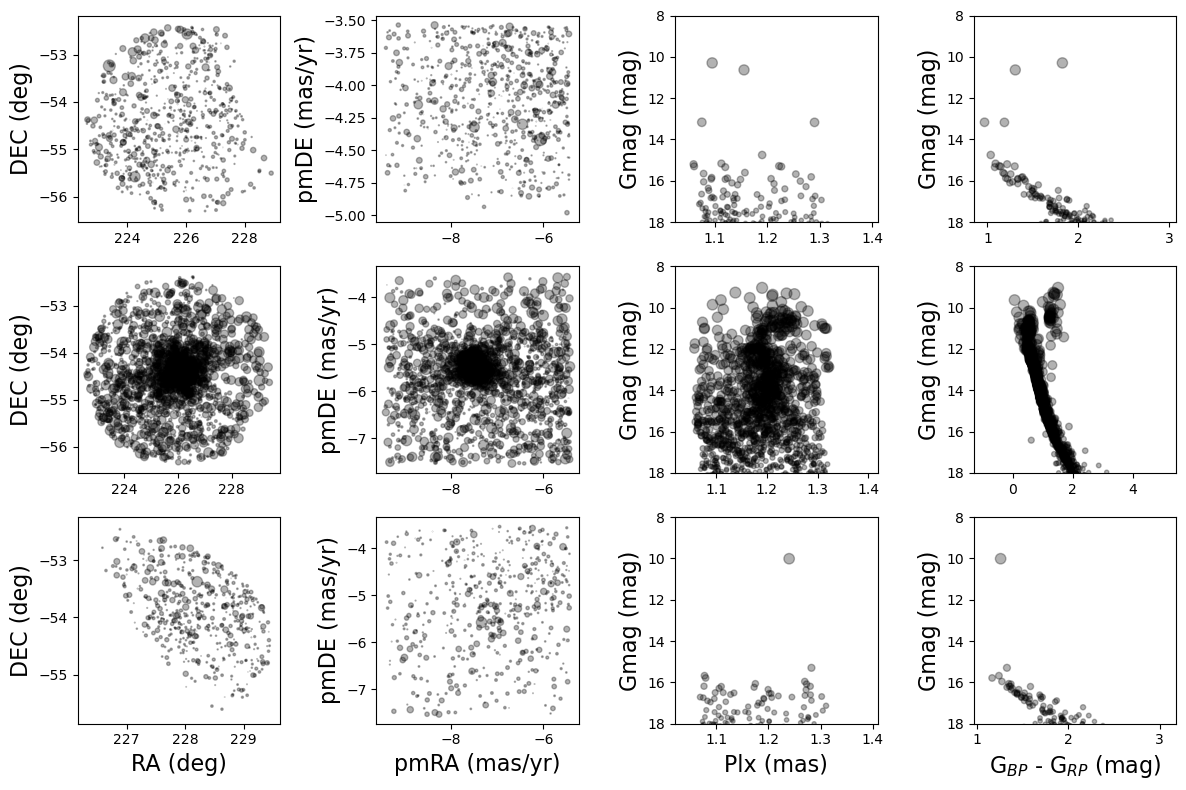

In [20]:
fig,ax = plt.subplots(3,4, figsize=(12,8),tight_layout=True)

ax[0,0].scatter(a1.RAJ2000, a1.DEJ2000, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,0].set_ylabel("DEC (deg)",fontsize=16)
ax[0,1].scatter(a1.pmRA, a1.pmDE, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[0,2].scatter(a1.Plx, a1.Gmag, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,2].set_ylim(18,8)
ax[0,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[0,3].scatter(a1["BP-RP"], a1.Gmag, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,3].set_ylim(18,8)
ax[0,3].set_ylabel("Gmag (mag)",fontsize=16)

ax[1,0].scatter(a2.RAJ2000, a2.DEJ2000, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,0].set_ylabel("DEC (deg)",fontsize=16)
ax[1,1].scatter(a2.pmRA, a2.pmDE, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[1,2].scatter(a2.Plx, a2.Gmag, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,2].set_ylim(18,8)
ax[1,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[1,3].scatter(a2["BP-RP"], a2.Gmag, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,3].set_ylim(18,8)
ax[1,3].set_ylabel("Gmag (mag)",fontsize=16)

ax[2,0].scatter(a3.RAJ2000, a3.DEJ2000, color='k', s=(19.5-a3.Gmag)*6, alpha=0.3)
ax[2,0].set_xlabel("RA (deg)",fontsize=16)
ax[2,0].set_ylabel("DEC (deg)",fontsize=16)
ax[2,1].scatter(a3.pmRA, a3.pmDE, color='k', s=(19.5-a3.Gmag)*6, alpha=0.3)
ax[2,1].set_xlabel("pmRA (mas/yr)",fontsize=16)
ax[2,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[2,2].scatter(a3.Plx, a3.Gmag, color='k', s=(19.5-a3.Gmag)*6, alpha=0.3)
ax[2,2].set_ylim(18,8)
ax[2,2].set_xlabel("Plx (mas)",fontsize=16)
ax[2,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[2,3].scatter(a3["BP-RP"], a3.Gmag, color='k', s=(19.5-a3.Gmag)*6, alpha=0.3)
ax[2,3].set_ylim(18,8)
ax[2,3].set_xlabel(r"G$_{BP}$ - G$_{RP}$ (mag)",fontsize=16)
ax[2,3].set_ylabel("Gmag (mag)",fontsize=16)

# ax[3,0].scatter(a4.RAJ2000, a4.DEJ2000, color='k', s=(19.5-a4.Gmag)*6, alpha=0.3)
# ax[3,0].set_xlabel("RA (deg)",fontsize=16)
# ax[3,0].set_ylabel("DEC (deg)",fontsize=16)
# ax[3,1].scatter(a4.pmRA, a4.pmDE, color='k', s=(19.5-a4.Gmag)*6, alpha=0.3)
# ax[3,1].set_xlabel("pmRA (mas/yr)",fontsize=16)
# ax[3,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
# ax[3,2].scatter(a4.Plx, a4.Gmag, color='k', s=(19.5-a4.Gmag)*6, alpha=0.3)
# ax[3,2].set_ylim(18,8)
# ax[3,2].set_xlabel("Plx (mas)",fontsize=16)
# ax[3,2].set_ylabel("Gmag (mag)",fontsize=16)
# ax[3,3].scatter(a4["BP-RP"], a4.Gmag, color='k', s=(19.5-a4.Gmag)*6, alpha=0.3)
# ax[3,3].set_ylim(18,8)
# ax[3,3].set_xlabel(r"G$_{BP}$ - G$_{RP}$ (mag)",fontsize=16)
# ax[3,3].set_ylabel("Gmag (mag)",fontsize=16)

# ax[4,0].scatter(a5.RAJ2000, a5.DEJ2000, color='k', s=(19.5-a5.Gmag)*6, alpha=0.3)
# ax[4,0].set_xlabel("RA (deg)",fontsize=16)
# ax[4,0].set_ylabel("DEC (deg)",fontsize=16)
# ax[4,1].scatter(a5.pmRA, a5.pmDE, color='k', s=(19.5-a5.Gmag)*6, alpha=0.3)
# ax[4,1].set_xlabel("pmRA (mas/yr)",fontsize=16)
# ax[4,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
# ax[4,2].scatter(a5.Plx, a5.Gmag, color='k', s=(19.5-a5.Gmag)*6, alpha=0.3)
# ax[4,2].set_ylim(18,8)
# ax[4,2].set_xlabel("Plx (mas)",fontsize=16)
# ax[4,2].set_ylabel("Gmag (mag)",fontsize=16)
# ax[4,3].scatter(a5["BP-RP"], a5.Gmag, color='k', s=(19.5-a5.Gmag)*6, alpha=0.3)
# ax[4,3].set_ylim(18,8)
# ax[4,3].set_xlabel(r"G$_{BP}$ - G$_{RP}$ (mag)",fontsize=16)
# ax[4,3].set_ylabel("Gmag (mag)",fontsize=16)

In [21]:
print(df2.groupby('cluster').mean())

            RAJ2000    DEJ2000      pmRA      pmDE       Gmag     BP-RP  \
cluster                                                                   
0        225.352489 -54.392191 -6.968348 -4.115524  20.023592  1.872647   
1        225.574179 -54.433355 -7.220003 -5.653337  18.855860  1.746652   
2        228.192523 -53.811227 -7.070241 -5.026775  19.982220  1.924662   

              Plx  
cluster            
0        1.215027  
1        1.208726  
2        1.212210  


In [22]:
# a1.to_csv('Catalogues/pop1_NGC5822_GMM4.csv', index=False) 
# a2.to_csv('Catalogues/pop2_NGC5822_GMM4.csv', index=False) 
# a3.to_csv('Catalogues/pop3_NGC5822_GMM4.csv', index=False) 
